# Blob Segmentation

In this notebook, we will segment and label the bright blobs in an image using Python. We'll use libraries such as `numpy`, `scikit-image`, and `stackview` for image processing and visualization.

## Step 1: Load the image

The image `blobs.png` should be downloaded to your local system or repository's data folder.

StackViewNDArray([[ 40,  32,  24, ..., 216, 200, 200],
                  [ 56,  40,  24, ..., 232, 216, 216],
                  [ 64,  48,  24, ..., 240, 232, 232],
                  ...,
                  [ 72,  80,  80, ...,  48,  48,  48],
                  [ 80,  80,  80, ...,  48,  48,  48],
                  [ 96,  88,  80, ...,  48,  48,  48]], dtype=uint8)
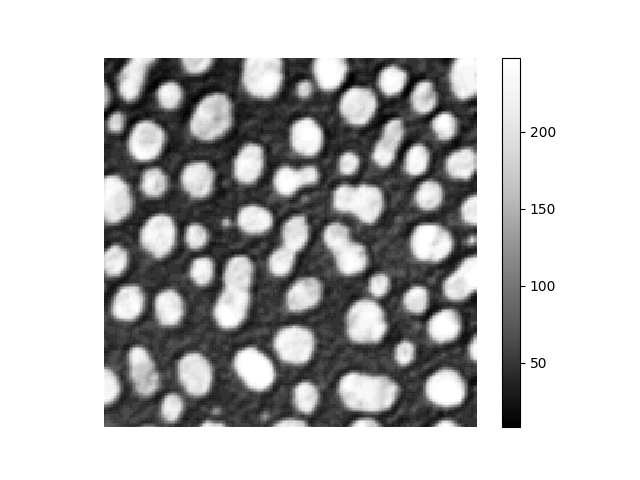
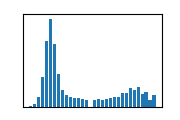

In [1]:
from skimage.io import imread
import stackview
import numpy as np

# Load the image from the data folder
image = imread('../data/blobs.png')

# Visualize the loaded image
stackview.insight(image)

## Step 2: Preprocessing

Apply a Gaussian blur to reduce noise and smoothen the image.

/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/napari_tools_menu/__init__.py:10: UserWarning: Importing QT failed; now introducing dummy definitions of QMenu class and register_function decorator.
  warnings.warn("Importing QT failed; now introducing dummy definitions of QMenu class and register_function decorator.")
/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/napari_tools_menu/__init__.py:221: UserWarning: Error in monkey patching napari. Please let @haesleinleinhuepf know at
https://github.com/haesleinhuepf/napari-tools-menu/issues
  warnings.warn("Error in monkey patching napari. Please let @haesleinleinhuepf know at\nhttps://github.com/haesleinhuepf/napari-tools-menu/issues")
/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/napari_skimage_regionprops/_table.py:7: UserWarning: No Qt bindings could be found
  warnings.warn(str(e))


StackViewNDArray([[ 40,  34,  29, ..., 222, 214, 209],
                  [ 43,  37,  31, ..., 227, 221, 217],
                  [ 43,  38,  34, ..., 233, 228, 225],
                  ...,
                  [ 74,  75,  75, ...,  48,  48,  48],
                  [ 80,  79,  78, ...,  48,  48,  48],
                  [ 86,  83,  80, ...,  48,  48,  48]], dtype=uint8)
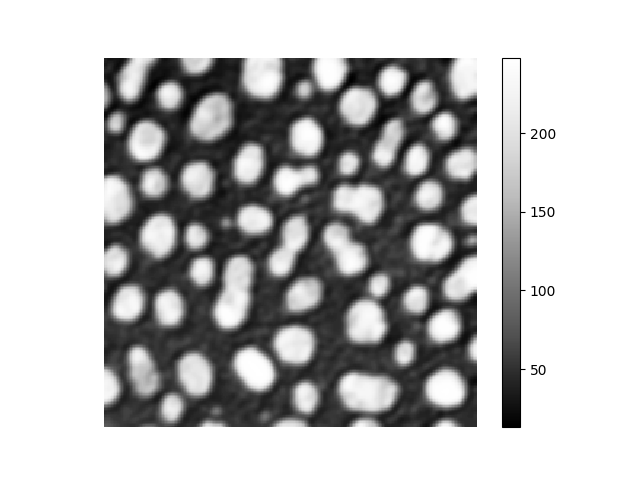
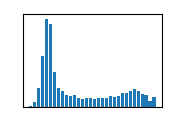

In [2]:
import napari_simpleitk_image_processing as nsitk

# Apply Gaussian blur
smoothed_image = nsitk.gaussian_blur(image, variance_x=2.0, variance_y=2.0)

# Visualize the smoothed image
stackview.insight(smoothed_image)

## Step 3: Segmentation using Otsu's Thresholding

Use Otsu's method to perform image segmentation.

StackViewNDArray([[0, 0, 0, ..., 1, 1, 1],
                  [0, 0, 0, ..., 1, 1, 1],
                  [0, 0, 0, ..., 1, 1, 1],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
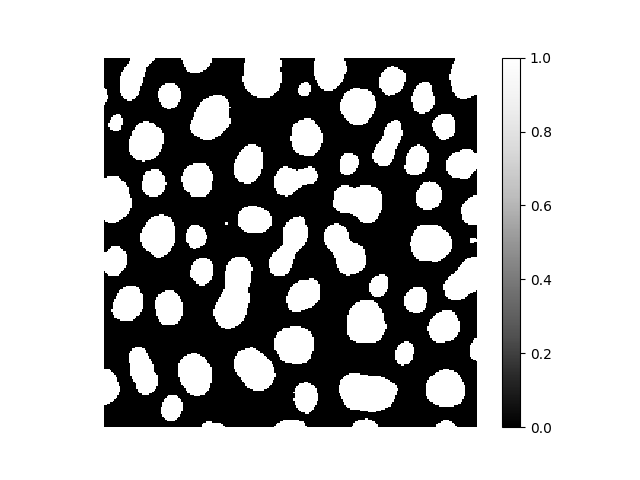
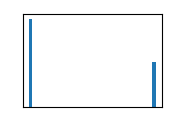

In [3]:
# Apply Otsu's threshold to obtain binary image
binary_image = nsitk.threshold_otsu(smoothed_image)

# Visualize the binary image
stackview.insight(binary_image)

## Step 4: Label connected components

Identify and label the connected components in the binary image.

StackViewNDArray([[0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
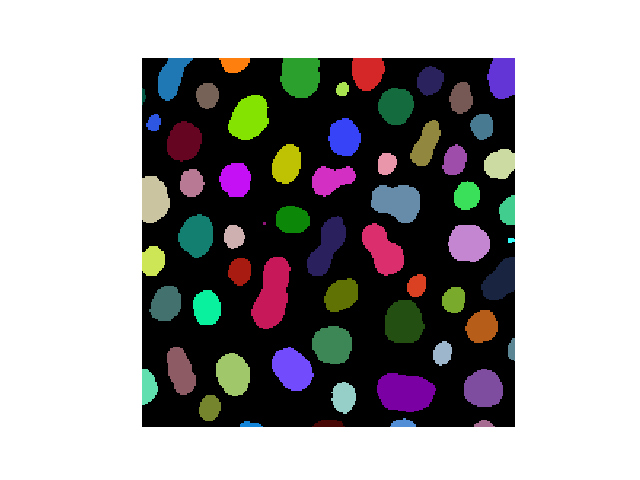

In [4]:
# Label connected components in the binary image
labeled_image = nsitk.connected_component_labeling(binary_image)

# Visualize the labeled image
stackview.insight(labeled_image)

## Step 5: Save results

Save the labeled segmentation image for future reference and analysis.

In [5]:
from skimage.io import imsave

# Save the labeled image
imsave('../results/labeled_blobs.png', (labeled_image * (255 / labeled_image.max())).astype(np.uint8))

FileNotFoundError: The directory '/home/runner/work/git-bob-bioimage-analysis-example/git-bob-bioimage-analysis-example/results' does not exist